In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Dictionary

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

##### Let's See what we have in our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Dataset have 730 non-null entries

##### Data at a Glance

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Let's check null values and Duplicated value in the dataset

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.duplicated().sum()

0

##### Let's check the dtypes of the variables available

In [8]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##### All the values are in correct format

##### column `instant` is just a index ..as we  get default index from pandas  also column `dteday` is also present in our dataset in one or another form , so  we will drop them

In [9]:
df = df.drop(columns=['instant','dteday'])

##### we have to drop the columns `casual` and `registered` because they both are present as sum as `cnt`

In [10]:
df = df.drop(columns=['casual','registered'])

In [11]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### We have some columns which are numerically coded  without having any ordinal order , as we know from Data Dictionary let's fill them back for better Understanding

In [12]:
replacement_dict_yr = {0: 2018, 1: 2019}
df['yr'] = df['yr'].replace(replacement_dict_yr)

In [13]:
replacement_dict_season = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].replace(replacement_dict_season)

In [14]:
replacement_dict_mnth = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',5:'may',6:'jun',
                         7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
df['mnth'] = df['mnth'].replace(replacement_dict_mnth)

In [15]:
replacement_dict_weathersit = {1: 'clear', 2: 'Cloudy', 3: 'Snow', 4: 'Rain'}
df['weathersit'] = df['weathersit'].replace(replacement_dict_weathersit)

In [16]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Data understanding and Visualisation

In [17]:
nature_variables = ['temp','atemp','windspeed','hum']

##### Let' s see spread of our numerical data 

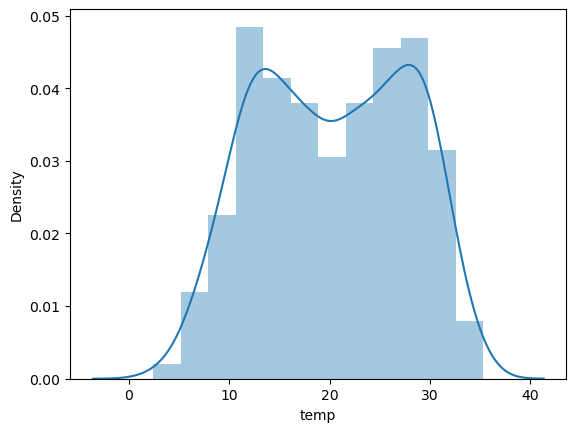

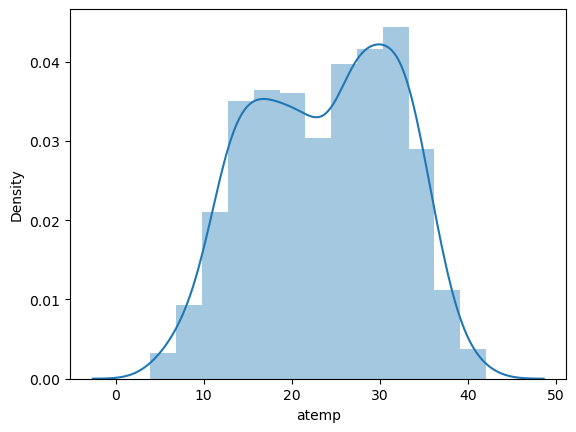

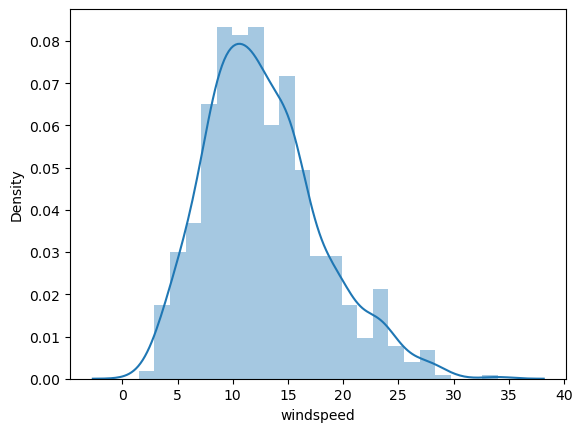

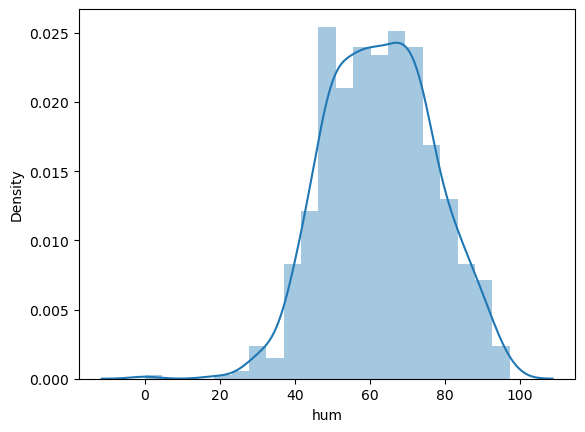

In [18]:
for i in nature_variables:
    sns.distplot(df[i])
    plt.show()

##### Plotting Pair-plot between numerical variables

In [19]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

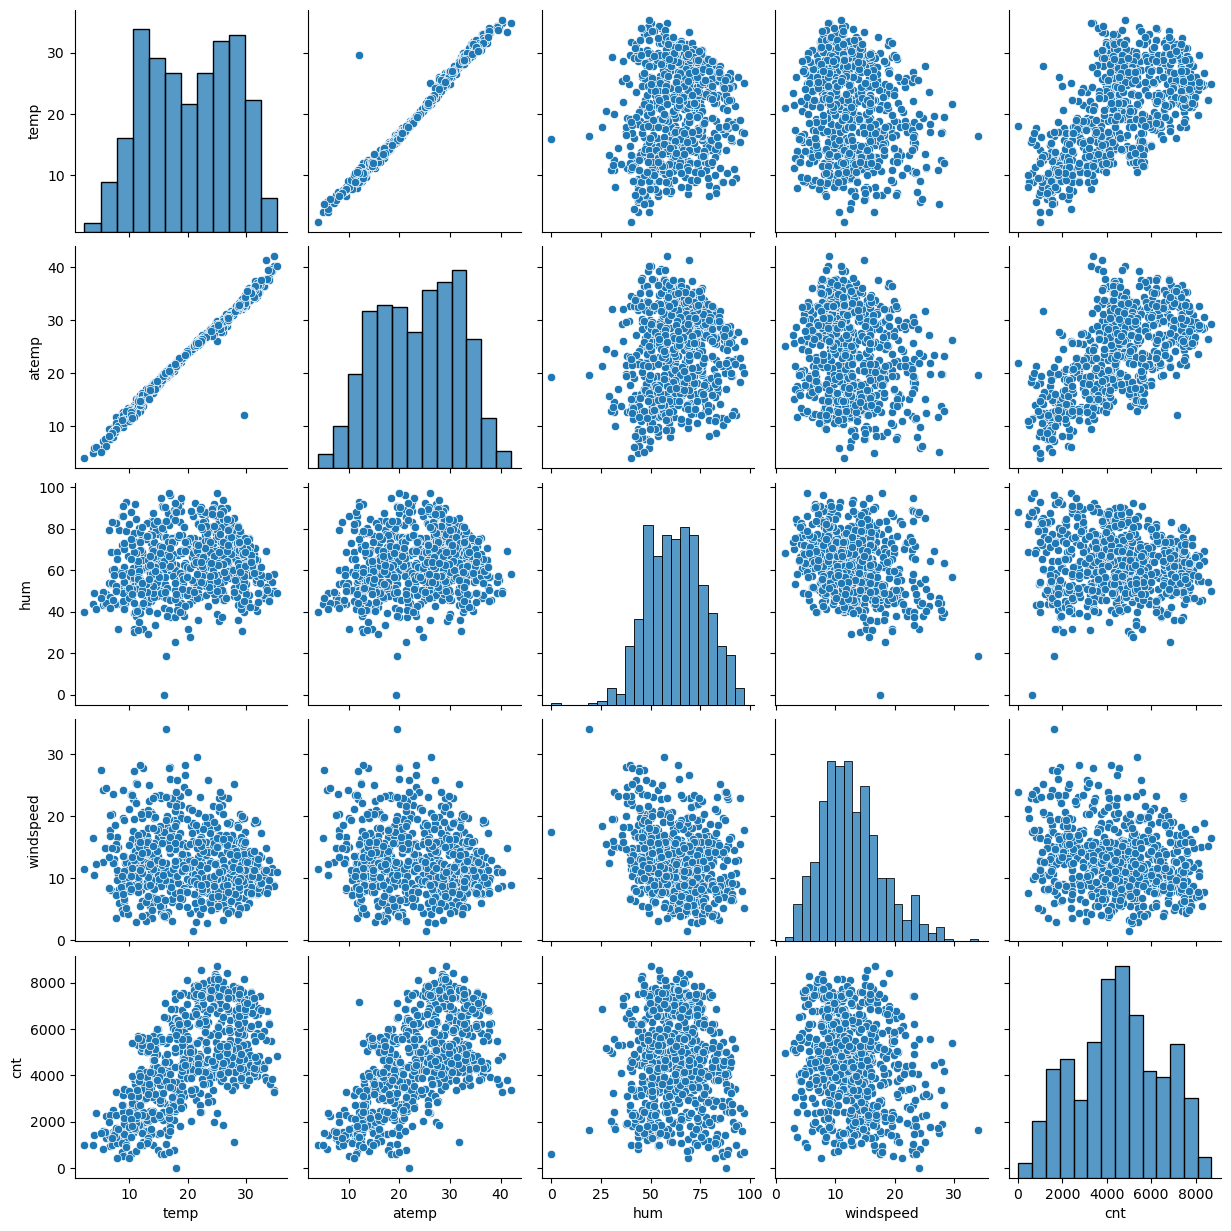

In [20]:
sns.pairplot(df[num_vars])
plt.show()

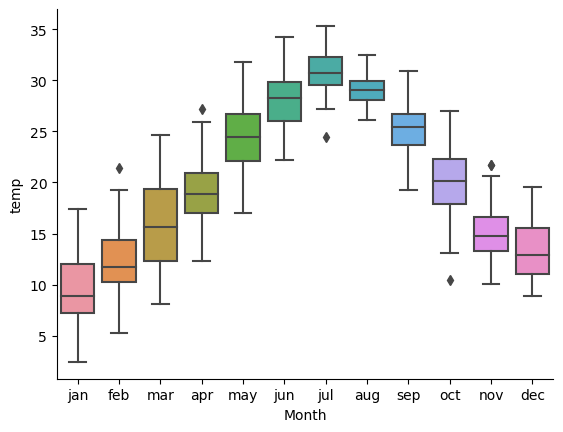

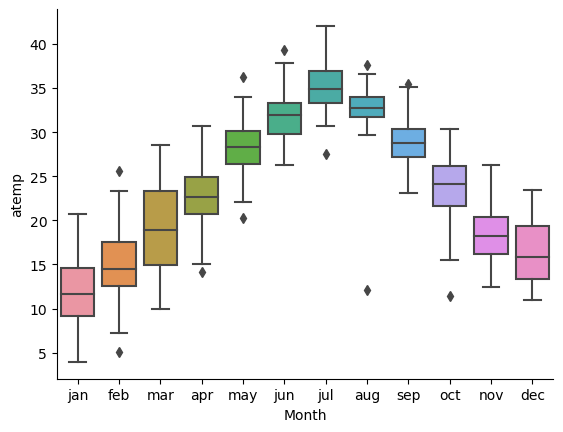

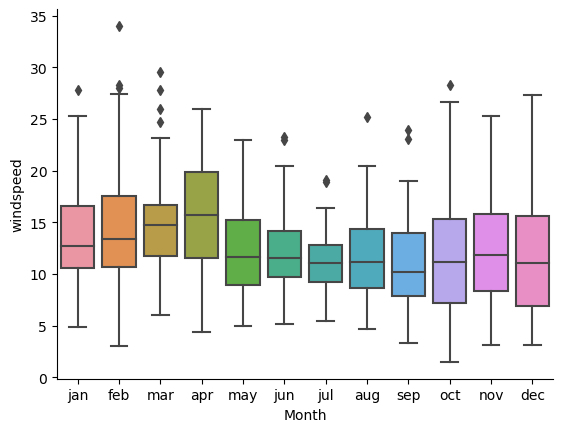

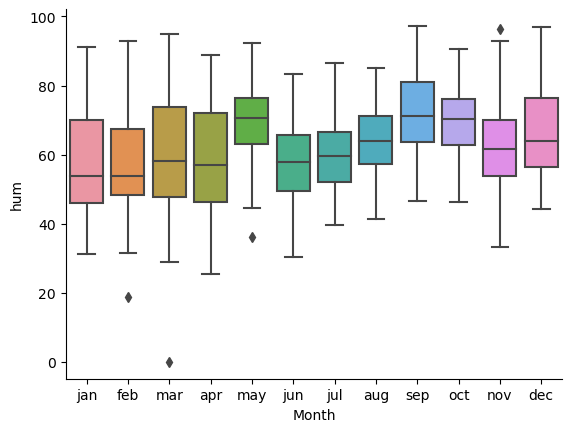

In [21]:
for i in nature_variables:
    sns.boxplot(data=df , y=df[i] , x=df['mnth'])
    plt.xlabel('Month')
    plt.ylabel(i)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

In [22]:
categorical_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

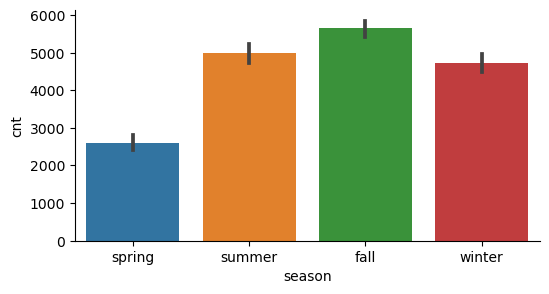

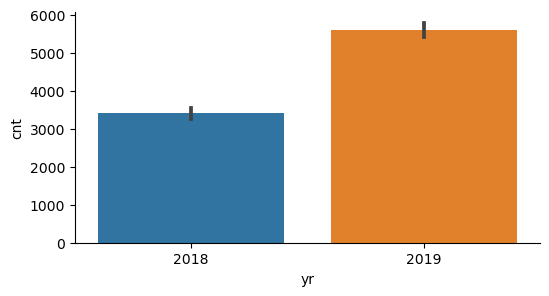

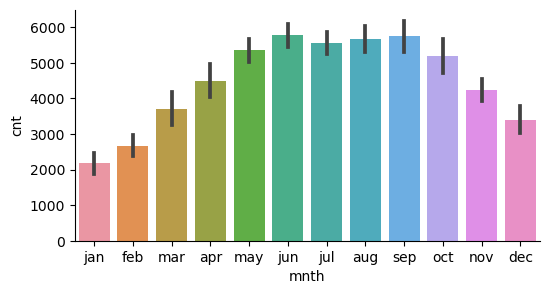

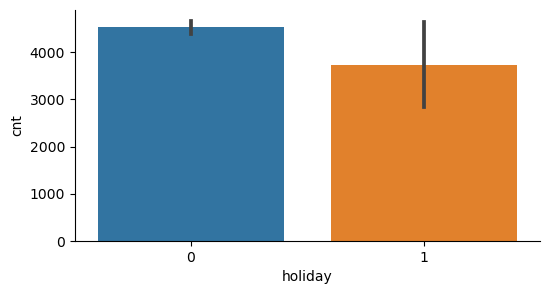

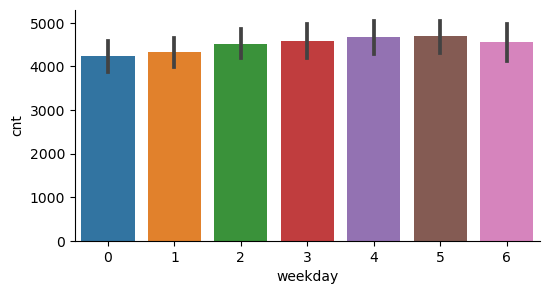

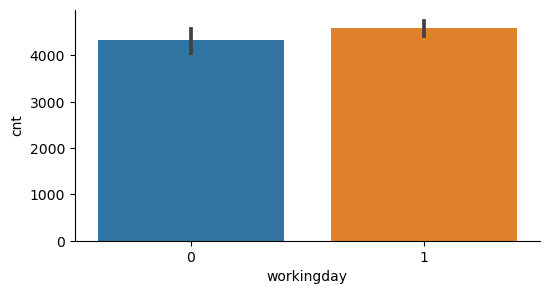

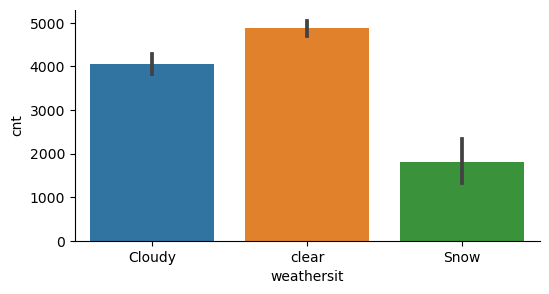

In [23]:
for i in categorical_variables:
    plt.figure(figsize=(6,3))
    sns.barplot(data=df , x=df[i],y=df['cnt'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

#### From above Graphs some observation can be made explicitly:-

##### 1) In weather situation like `Snow` having lowest and `clear` having highest number of bike riders

##### 2) Column like `weekday` and `workingday` does not show any decisive pattern about number of bike riders

##### 3) from may to september in `mnth` showing high number of bike riders compare to rest of the months

##### 4) In season of `fall` having highest number of bike riders

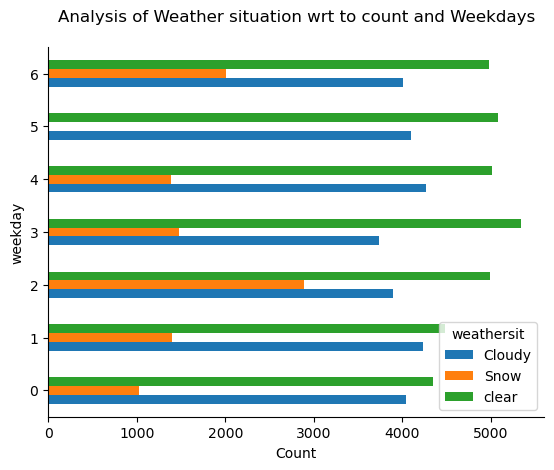

In [24]:
x = pd.pivot_table(data=df , index='weekday',columns='weathersit',values='cnt',aggfunc='mean').plot(kind='barh')
plt.title('Analysis of Weather situation wrt to count and Weekdays\n')
plt.xlabel('Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### when weather situation is `snow` then there is very low number of riders compare to other weather situations,also `clear` weather situation showing highest number of ike riders across weekdays

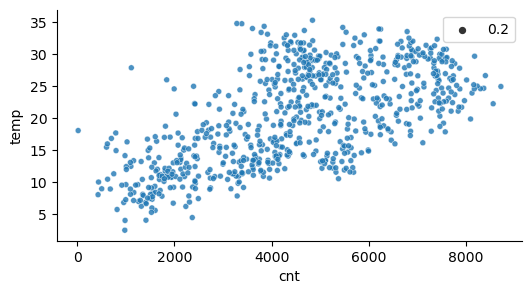

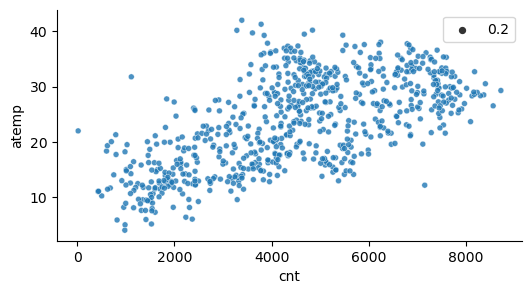

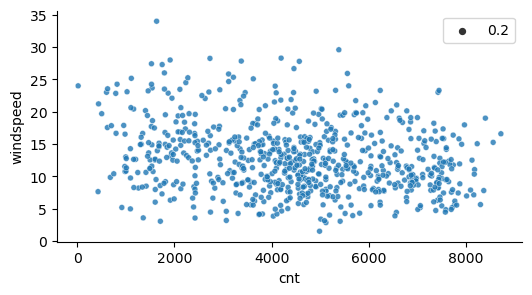

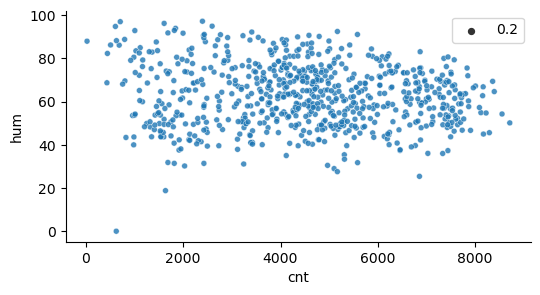

In [25]:
for i in nature_variables:
    plt.figure(figsize=(6,3))
    sns.scatterplot(data=df , x=df['cnt'] , y=df[i],size=0.2,alpha=0.8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

#####  when `temp` increases number of bike riders also increases ....also bike riders prefer low `windspeed` and hummidity range of `40` to `90` 

In [26]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801


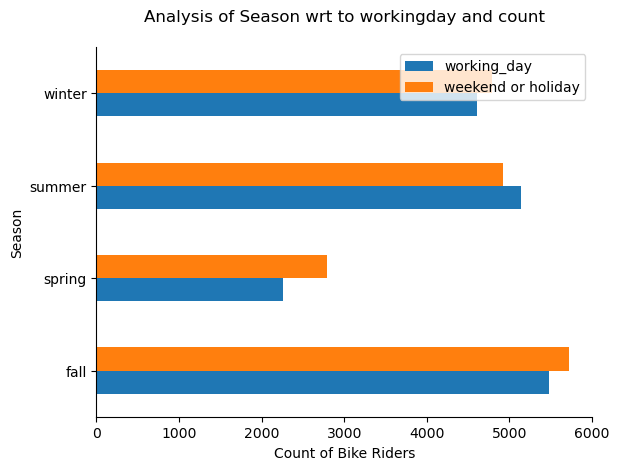

In [27]:
pd.crosstab(df['season'],df['workingday'] , values=df['cnt'],aggfunc='mean').plot(kind='barh').legend(['working_day','weekend or holiday'],loc='upper right') 
plt.title('Analysis of Season wrt to workingday and count\n')
plt.xlabel('Count of Bike Riders')
plt.ylabel('Season')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

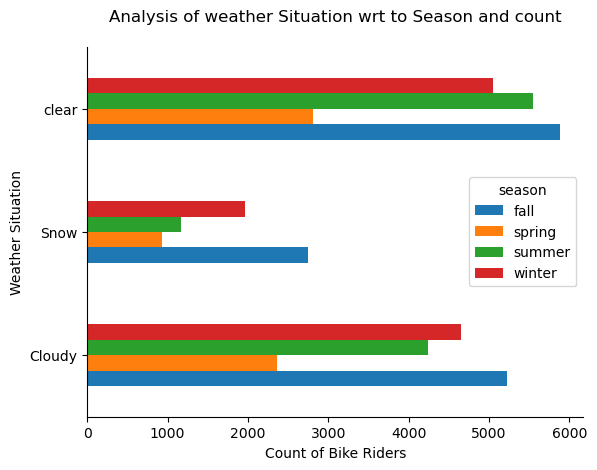

In [28]:
pd.crosstab(df['weathersit'] ,df['season'] ,values=df['cnt'] ,aggfunc='mean').plot(kind='barh')
plt.title('Analysis of weather Situation wrt to Season and count\n')
plt.xlabel('Count of Bike Riders')
plt.ylabel('Weather Situation')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

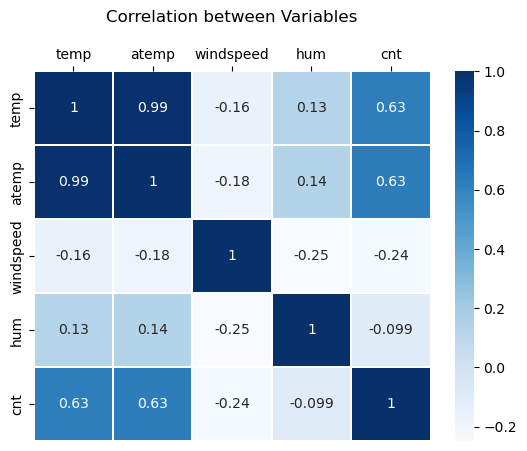

In [29]:
ax = sns.heatmap(df[['temp', 'atemp', 'windspeed', 'hum','cnt']].corr(),cmap='Blues',annot=True,linewidths=0.1,linecolor='white')
ax.xaxis.tick_top()
plt.title('Correlation between Variables\n')
plt.show()

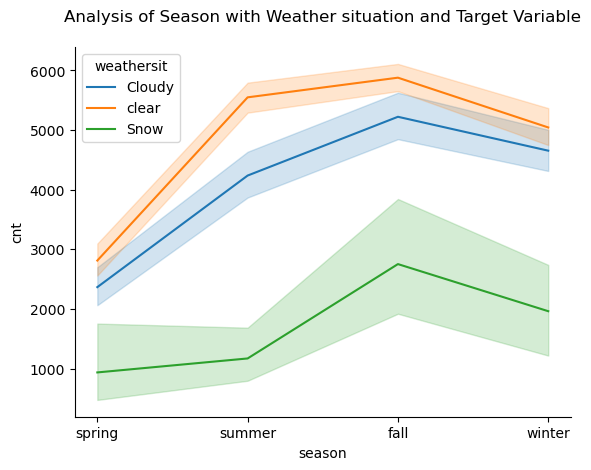

In [30]:
sns.lineplot(data=df , y=df['cnt'] , x=df['season'],hue=df['weathersit'] , markers='o',dashes=False)
plt.title('Analysis of Season with Weather situation and Target Variable\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### 

##### The Seaon Spring has the lowest number of bike rider among all season in general and summer and fall see's high number of bike riders

##### plotting mnth and count with `yr`

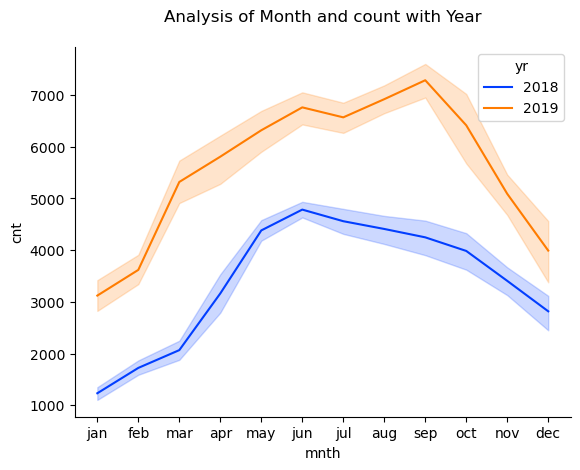

In [31]:
sns.lineplot(data=df , x=df['mnth'] , y=df['cnt'],hue=df['yr'],palette='bright')
plt.title('Analysis of Month and count with Year\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Month `Aug` ,`jun` and `sep` are 3 month where there are high number of bike riders

##### Analyzing `weekday` and `working day` with Target Variable

In [32]:
pd.crosstab(df['weekday'],df['workingday'],values=df['cnt'],aggfunc='sum',margins=True)

workingday,0,1,All
weekday,,,
0,444027.0,NaN,444027
1,59605.0,395898.0,455503
2,1013.0,468096.0,469109
3,7403.0,463811.0,471214
4,3920.0,481475.0,485395
5,6494.0,481296.0,487790
6,477807.0,NaN,477807
All,1000269.0,2290576.0,3290845


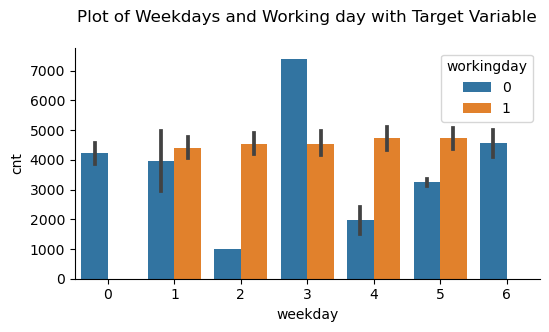

In [33]:
plt.figure(figsize=(6,3))
sns.barplot(data=df , x=df['weekday'] , y=df['cnt'] , hue=df['workingday'])
plt.title('Plot of Weekdays and Working day with Target Variable\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [34]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

In [35]:
for i in cat_cols :
    print(f"For '{i}' we have :- ")
    print(df[i].value_counts())
    print('\n') 

For 'season' we have :- 
season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


For 'yr' we have :- 
yr
2018    365
2019    365
Name: count, dtype: int64


For 'mnth' we have :- 
mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64


For 'holiday' we have :- 
holiday
0    709
1     21
Name: count, dtype: int64


For 'weekday' we have :- 
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64


For 'workingday' we have :- 
workingday
1    499
0    231
Name: count, dtype: int64


For 'weathersit' we have :- 
weathersit
clear     463
Cloudy    246
Snow       21
Name: count, dtype: int64




In [36]:
to_dummy_variables = ['season','mnth','weekday','weathersit','yr']

In [37]:
df = pd.get_dummies(columns=to_dummy_variables,drop_first=True,data=df).astype(float)

In [38]:
df

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Snow,weathersit_clear,yr_2019
0,0.0,0.0,14.110847,18.18125,80.5833,10.749882,985.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,14.902598,17.68695,69.6087,16.652113,801.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,1.0,10.420847,11.33210,65.2917,23.458911,2114.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
726,0.0,1.0,10.386653,12.75230,59.0000,10.416557,3095.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
727,0.0,0.0,10.386653,12.12000,75.2917,8.333661,1341.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.0,0.0,10.489153,11.58500,48.3333,23.500518,1796.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [39]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df , test_size=0.2 ,random_state=42)

In [40]:
df_train.shape

(584, 30)

In [41]:
df_test.shape

(146, 30)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [44]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Snow,weathersit_clear,yr_2019
247,1.0,0.0,0.765327,0.717455,0.814513,0.475900,0.382996,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0.0,1.0,0.317788,0.331261,0.644911,0.195963,0.450759,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
702,0.0,1.0,0.519232,0.511907,0.756118,0.379454,0.757478,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
440,0.0,0.0,0.566998,0.559152,0.778874,0.220845,0.898988,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
136,0.0,1.0,0.626185,0.603102,0.863461,0.637592,0.471813,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y_train = df_train.pop('cnt')

In [47]:
y_train

247    0.382996
335    0.450759
702    0.757478
440    0.898988
136    0.471813
         ...   
71     0.275541
106    0.428210
270    0.446963
435    0.606995
102    0.246203
Name: cnt, Length: 584, dtype: float64

In [48]:
X_train = df_train

In [49]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Snow,weathersit_clear,yr_2019
247,1.0,0.0,0.765327,0.717455,0.814513,0.475900,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0.0,1.0,0.317788,0.331261,0.644911,0.195963,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
702,0.0,1.0,0.519232,0.511907,0.756118,0.379454,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
440,0.0,0.0,0.566998,0.559152,0.778874,0.220845,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
136,0.0,1.0,0.626185,0.603102,0.863461,0.637592,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Importing sklearn library for linear regression to compute RFE

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

##### Applying RFE with target of 15 Variables

In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=regressor,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

##### List of columns with RFE Support and RFE ranking

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 4),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 8),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sep', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 13),
 ('weekday_3', False, 10),
 ('weekday_4', False, 14),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_Snow', True, 1),
 ('weathersit_clear', True, 1),
 ('yr_2019', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]

In [54]:
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_sep', 'weekday_6',
       'weathersit_Snow', 'weathersit_clear', 'yr_2019'],
      dtype='object')

##### Selecting all the columns Which RFE supports and proceeding with same

In [55]:
X_train_rfe = X_train[col]

In [56]:
import statsmodels.api as sm

##### Using Statsmodel for Detailed Stastistical Considerations

In [57]:
X_train_sm = sm.add_constant(X_train_rfe)
statsmodel_lr = sm.OLS(y_train,X_train_sm)
statsmodel_lr_model = statsmodel_lr.fit()
statsmodel_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.18e-209
Time:                        21:24:19   Log-Likelihood:                 566.67
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     568   BIC:                            -1031.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3170      0.037      8.606      0.000       0.245       0.389
temp                 0.0983      0.225      0.436      0.663      -0.344       0.541
atemp                0.3553      0.241      1.476      0.141      -0.118       0.828
hum                 -0.1640      0.037     -4.451      0.000      -0.236      -0.092
windspeed           -0.1300      0.023     -5.655      0.000      -0.175      -0.085
season_spring       -0.1440      0.015     -9.358      0.000      -0.174      -0.114
season_winter        0.0834      0.013      6.295      0.000       0.057       0.109
mnth_dec            -0.0585      0.017     -3.508      0.000      -0.091      -0.026
mnth_jul            -0.0594      0.016     -3.819      0.000      -0.090      -0.029
mnth_mar             0.0512      0.016      3.121      0.002       0.019       0.083
mnth_nov            -0.0792      0.017     -4.530      0.000      -0.114      -0.045
mnth_sep             0.0527      0.015      3.573      0.000       0.024       0.082
weekday_6            0.0233      0.011      2.119      0.035       0.002       0.045
weathersit_Snow     -0.1823      0.023     -7.763      0.000      -0.228      -0.136
weathersit_clear     0.0483      0.010      4.696      0.000       0.028       0.068
yr_2019              0.2265      0.008     28.886      0.000       0.211       0.242
==============================================================================
Omnibus:                       98.479   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.664
Skew:                          -0.897   Prob(JB):                     9.95e-50
Kurtosis:                       5.461   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Using Statsmodel VIF(variation inflation factor) for more information on Multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,1260.99
0,temp,1220.76
2,hum,20.62
3,windspeed,5.35
13,weathersit_clear,3.30
4,season_spring,2.92
5,season_winter,2.89
14,yr_2019,2.07
9,mnth_nov,1.80
7,mnth_jul,1.51


##### we have `atemp`   high `VIF` and  `p_value` so we proceed by removing it 

In [60]:
X_train_new = X_train_rfe.drop('atemp',axis=1)

In [61]:
X_train_sm = sm.add_constant(X_train_new)
statsmodel_lr = sm.OLS(y_train,X_train_sm)
statsmodel_lr_model = statsmodel_lr.fit()
statsmodel_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.40e-210
Time:                        21:24:20   Log-Likelihood:                 565.55
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     569   BIC:                            -1036.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3198      0.037      8.686      0.000       0.248       0.392
temp                 0.4277      0.032     13.484      0.000       0.365       0.490
hum                 -0.1562      0.036     -4.278      0.000      -0.228      -0.084
windspeed           -0.1379      0.022     -6.163      0.000      -0.182      -0.094
season_spring       -0.1456      0.015     -9.471      0.000      -0.176      -0.115
season_winter        0.0854      0.013      6.474      0.000       0.059       0.111
mnth_dec            -0.0584      0.017     -3.493      0.001      -0.091      -0.026
mnth_jul            -0.0605      0.016     -3.890      0.000      -0.091      -0.030
mnth_mar             0.0527      0.016      3.214      0.001       0.020       0.085
mnth_nov            -0.0797      0.017     -4.555      0.000      -0.114      -0.045
mnth_sep             0.0499      0.015      3.408      0.001       0.021       0.079
weekday_6            0.0232      0.011      2.105      0.036       0.002       0.045
weathersit_Snow     -0.1866      0.023     -8.005      0.000      -0.232      -0.141
weathersit_clear     0.0498      0.010      4.867      0.000       0.030       0.070
yr_2019              0.2270      0.008     28.934      0.000       0.212       0.242
==============================================================================
Omnibus:                       93.794   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.696
Skew:                          -0.864   Prob(JB):                     1.77e-46
Kurtosis:                       5.381   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,temp,19.31
1,hum,19.26
2,windspeed,5.04
12,weathersit_clear,3.23
3,season_spring,2.91
4,season_winter,2.85
13,yr_2019,2.06
8,mnth_nov,1.80
6,mnth_jul,1.51
5,mnth_dec,1.41


##### `hum` variable showing high VIF score we drop it

In [63]:
X_train_new1 = X_train_new.drop('hum',axis=1)

In [64]:
X_train_sm = sm.add_constant(X_train_new1)
statsmodel_lr = sm.OLS(y_train,X_train_sm)
statsmodel_lr_model = statsmodel_lr.fit()
statsmodel_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.28e-207
Time:                        21:24:20   Log-Likelihood:                 556.30
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     570   BIC:                            -1023.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2059      0.026      7.976      0.000       0.155       0.257
temp                 0.4025      0.032     12.723      0.000       0.340       0.465
windspeed           -0.1127      0.022     -5.142      0.000      -0.156      -0.070
season_spring       -0.1487      0.016     -9.542      0.000      -0.179      -0.118
season_winter        0.0785      0.013      5.908      0.000       0.052       0.105
mnth_dec            -0.0646      0.017     -3.826      0.000      -0.098      -0.031
mnth_jul            -0.0529      0.016     -3.371      0.001      -0.084      -0.022
mnth_mar             0.0561      0.017      3.374      0.001       0.023       0.089
mnth_nov            -0.0790      0.018     -4.450      0.000      -0.114      -0.044
mnth_sep             0.0432      0.015      2.927      0.004       0.014       0.072
weekday_6            0.0237      0.011      2.120      0.034       0.002       0.046
weathersit_Snow     -0.2078      0.023     -8.984      0.000      -0.253      -0.162
weathersit_clear     0.0754      0.008      8.930      0.000       0.059       0.092
yr_2019              0.2318      0.008     29.427      0.000       0.216       0.247
==============================================================================
Omnibus:                       91.200   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.203
Skew:                          -0.843   Prob(JB):                     4.55e-45
Kurtosis:                       5.355   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values,i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,temp,6.26
1,windspeed,4.87
11,weathersit_clear,2.82
3,season_winter,2.37
12,yr_2019,2.06
2,season_spring,1.85
7,mnth_nov,1.76
5,mnth_jul,1.43
4,mnth_dec,1.34
8,mnth_sep,1.22


##### `temp` variable is showing high VIF but dropping `temp` reduces R-squared score by nearly 4% so we will try dropping `windspeed` 

In [66]:
X_train_new2 = X_train_new1.drop('windspeed',axis=1)

In [67]:
X_train_sm = sm.add_constant(X_train_new2)
statsmodel_lr = sm.OLS(y_train,X_train_sm)
statsmodel_lr_model = statsmodel_lr.fit()
statsmodel_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.30e-203
Time:                        21:24:20   Log-Likelihood:                 543.06
No. Observations:                 584   AIC:                            -1060.
Df Residuals:                     571   BIC:                            -1003.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1415      0.023      6.132      0.000       0.096       0.187
temp                 0.4263      0.032     13.329      0.000       0.363       0.489
season_spring       -0.1432      0.016     -9.014      0.000      -0.174      -0.112
season_winter        0.0892      0.013      6.649      0.000       0.063       0.116
mnth_dec            -0.0574      0.017     -3.336      0.001      -0.091      -0.024
mnth_jul            -0.0486      0.016     -3.038      0.002      -0.080      -0.017
mnth_mar             0.0592      0.017      3.487      0.001       0.026       0.093
mnth_nov            -0.0795      0.018     -4.377      0.000      -0.115      -0.044
mnth_sep             0.0484      0.015      3.212      0.001       0.019       0.078
weekday_6            0.0233      0.011      2.040      0.042       0.001       0.046
weathersit_Snow     -0.2248      0.023     -9.611      0.000      -0.271      -0.179
weathersit_clear     0.0758      0.009      8.791      0.000       0.059       0.093
yr_2019              0.2318      0.008     28.784      0.000       0.216       0.248
==============================================================================
Omnibus:                       97.491   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.957
Skew:                          -0.876   Prob(JB):                     7.05e-51
Kurtosis:                       5.534   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Dropping `windspeed` doesn't reduce R-squared as dropping `temp` variable , also `temp` variable VIF score comes within range 

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values,i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,temp,4.05
10,weathersit_clear,2.80
2,season_winter,2.35
11,yr_2019,2.06
6,mnth_nov,1.74
1,season_spring,1.50
4,mnth_jul,1.39
3,mnth_dec,1.33
7,mnth_sep,1.22
5,mnth_mar,1.16


In [69]:
y_train_pred = statsmodel_lr_model.predict(X_train_sm)

In [70]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train,y_train_pred)
round(r2_score_train,2)

0.82

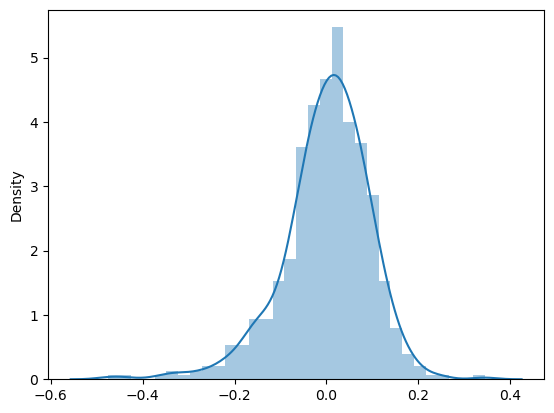

In [71]:
res = y_train-y_train_pred
sns.distplot(res,kde=True)
plt.show()

##### Transforming Test Data 

In [72]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.head(2)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Snow,weathersit_clear,yr_2019
468,0.0,0.0,0.543115,0.536771,0.518248,0.421436,0.855729,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
148,0.0,0.0,0.758058,0.704203,0.843709,0.479005,0.548320,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Y_test

In [74]:
y_test = df_test.pop('cnt')

##### X_test

In [75]:
X_test = df_test

##### after statistical Consideration We have arrived these final Variables

In [76]:
final_variables = list(X_train_new2.columns)

In [77]:
X_test_sm = X_test[final_variables]

In [78]:
X_test_sm.columns

Index(['temp', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_mar', 'mnth_nov', 'mnth_sep', 'weekday_6', 'weathersit_Snow',
       'weathersit_clear', 'yr_2019'],
      dtype='object')

In [79]:
X_test_sm = sm.add_constant(X_test_sm)

In [80]:
y_test_pred = statsmodel_lr_model.predict(X_test_sm)

##### Residuals

In [81]:
res_test = y_test-y_test_pred

##### Checking r2 score for test data

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score = r2_score(y_test,y_test_pred)

In [84]:
round(r2_score,2)

0.83

##### Our Linear regression model paramaters

In [85]:
statsmodel_lr_model.params.sort_values()

weathersit_Snow    -0.224837
season_spring      -0.143225
mnth_nov           -0.079456
mnth_dec           -0.057408
mnth_jul           -0.048639
weekday_6           0.023337
mnth_sep            0.048386
mnth_mar            0.059198
weathersit_clear    0.075835
season_winter       0.089199
const               0.141463
yr_2019             0.231771
temp                0.426293
dtype: float64

##### Validation of Linear Regression Assumption and Visualization 

#### 1 ) Linearity: 
##### The relationship between the independent variable(s) and the dependent variable is linear.

##### This can be Visualize by scatter plot of predictor Variables and target Variable

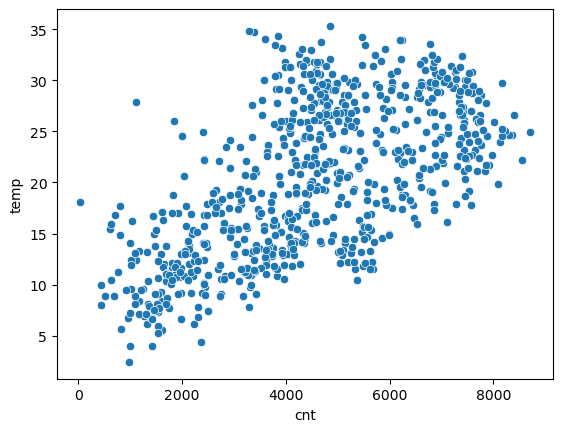

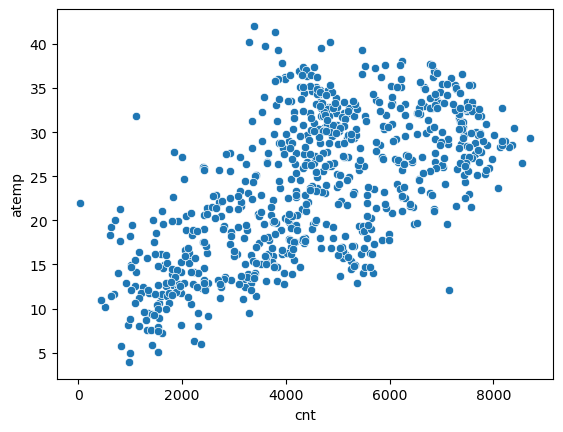

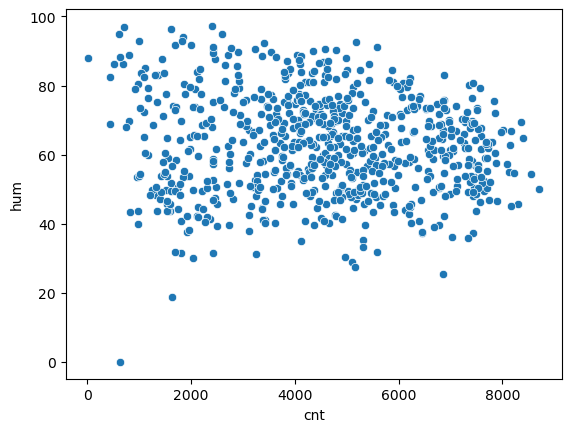

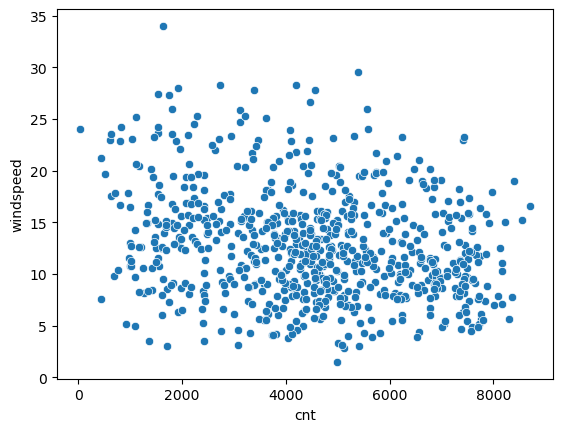

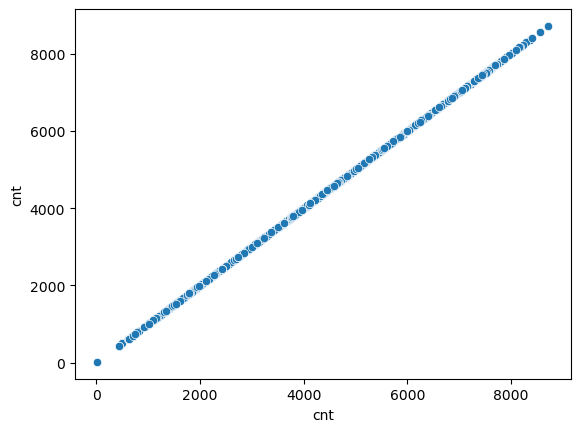

In [86]:
for i in num_vars:
    sns.scatterplot(data=df , y=df[i] , x=df['cnt'])
    plt.show()

##### 2) Normality of residuals:

##### The residuals should be normally distributed.

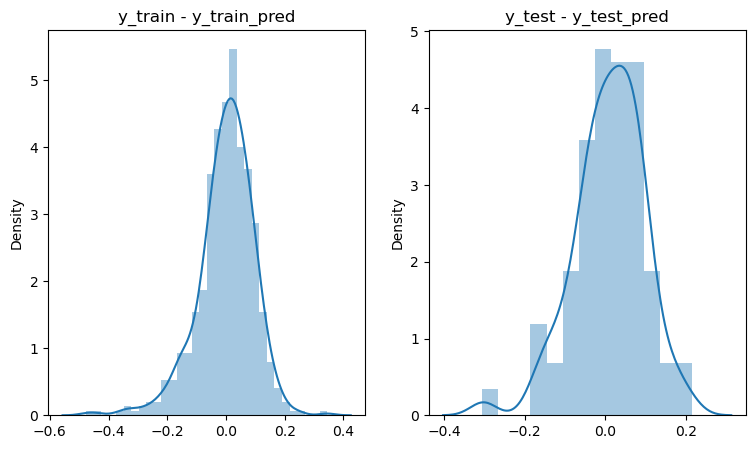

In [87]:
plt.figure(figsize= (9,5))
plt.subplot(1,2,1)
sns.distplot(res)
plt.title('y_train - y_train_pred')
plt.subplot(1,2,2)
sns.distplot(res_test)
plt.title('y_test - y_test_pred')
plt.show()

##### 3) No perfect multicollinearity:

##### Independent variables should not be perfectly correlated with each other.

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values,i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,temp,4.05
10,weathersit_clear,2.80
2,season_winter,2.35
11,yr_2019,2.06
6,mnth_nov,1.74
1,season_spring,1.50
4,mnth_jul,1.39
3,mnth_dec,1.33
7,mnth_sep,1.22
5,mnth_mar,1.16


##### 4) Homoscedasticity (Constant Variance)

##### The variance of the residuals should be constant across all levels of the independent variable(s).

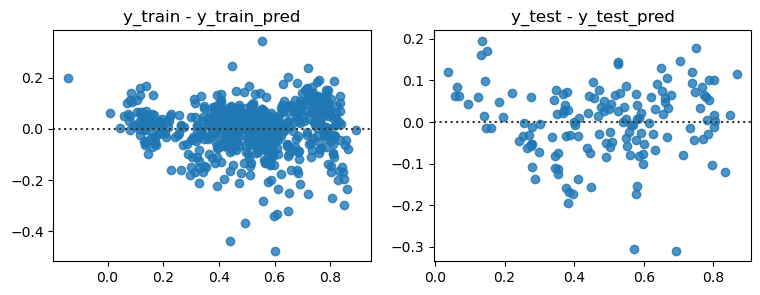

In [89]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
sns.residplot(x=y_train_pred, y=res, lowess=False)
plt.title('y_train - y_train_pred')
plt.subplot(1,2,2)
sns.residplot(x=y_test_pred, y=res_test, lowess=False)
plt.title('y_test - y_test_pred')
plt.show()

##### Clearly there is no noticeable funneling or fanning out of points and also the spread of residuals is relatively consistent 

##### 5) No autocorrelation of residuals
##### The residuals should not show a systematic pattern over time

In [90]:
statsmodel_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.30e-203
Time:                        21:24:23   Log-Likelihood:                 543.06
No. Observations:                 584   AIC:                            -1060.
Df Residuals:                     571   BIC:                            -1003.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1415      0.023      6.132      0.000       0.096       0.187
temp                 0.4263      0.032     13.329      0.000       0.363       0.489
season_spring       -0.1432      0.016     -9.014      0.000      -0.174      -0.112
season_winter        0.0892      0.013      6.649      0.000       0.063       0.116
mnth_dec            -0.0574      0.017     -3.336      0.001      -0.091      -0.024
mnth_jul            -0.0486      0.016     -3.038      0.002      -0.080      -0.017
mnth_mar             0.0592      0.017      3.487      0.001       0.026       0.093
mnth_nov            -0.0795      0.018     -4.377      0.000      -0.115      -0.044
mnth_sep             0.0484      0.015      3.212      0.001       0.019       0.078
weekday_6            0.0233      0.011      2.040      0.042       0.001       0.046
weathersit_Snow     -0.2248      0.023     -9.611      0.000      -0.271      -0.179
weathersit_clear     0.0758      0.009      8.791      0.000       0.059       0.093
yr_2019              0.2318      0.008     28.784      0.000       0.216       0.248
==============================================================================
Omnibus:                       97.491   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.957
Skew:                          -0.876   Prob(JB):                     7.05e-51
Kurtosis:                       5.534   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### `Durbin-Watson:	2.077`  A value close to 2 suggests no autocorrelation

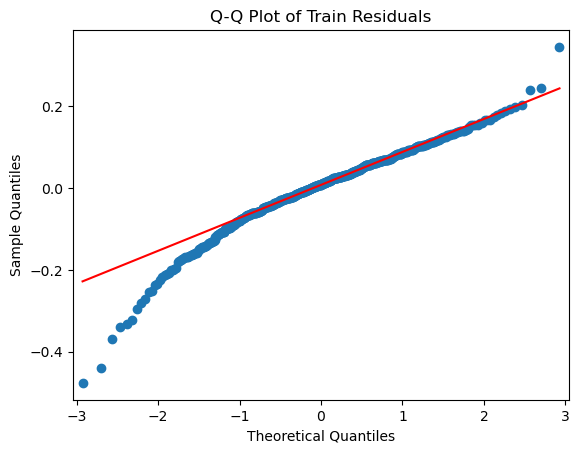

In [91]:
sm.qqplot(res, line='q')
plt.title('Q-Q Plot of Train Residuals')
plt.show()

In [92]:
res_test = y_test-y_test_pred

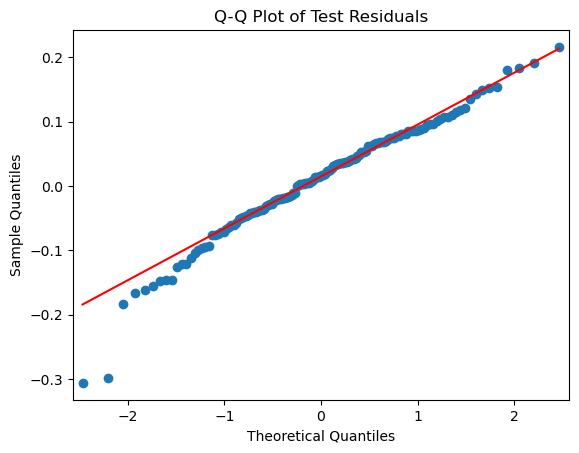

In [93]:
sm.qqplot(res_test, line='q')
plt.title('Q-Q Plot of Test Residuals')
plt.show()

##### data points lying on line shows that residuals are showing Normal distribution

##### We have following R-squared score

##### Test dataset r2 score

In [94]:
round(r2_score,2)

0.83

##### Train Dataset r2 score

In [95]:
round(r2_score_train,2)

0.82